In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [71]:
# create random weights of n x d
def create_random_weights(n, d):
    return np.random.rand(n, d)

weights = create_random_weights(100, 10) # will be replaced by actual test weights
weights.shape

(100, 10)

In [72]:
# create training data
def create_training_data(n, d):
    X = np.random.rand(n, d)
    y = np.random.rand(n)
    return X, y

data = create_training_data(100, 10) # will be replaced by actual training
data[0].shape, data[1].shape

((100, 10), (100,))

In [73]:
# create a function to calculate the loss
def calculate_loss(weights, X, y):
    predictions = np.dot(X, weights.T)
    loss = np.mean((predictions - y.reshape(-1, 1)) ** 2)
    return loss


In [74]:
# test the calculate_loss function
loss = calculate_loss(weights, data[0], data[1])
print(f"Calculated Loss: {loss}")

Calculated Loss: 4.979371874494536


In [75]:
# create a function to plot the loss
def plot_loss(losses):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(len(losses)), y=losses)
    plt.title('Loss Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

In [76]:
# create a forward pass function
def forward_pass(X, weights):
    return np.dot(X, weights.T)

In [77]:
# create a backward pass function using newtons method
def backward_pass(X, y, weights):
    predictions = forward_pass(X, weights)
    errors = predictions - y.reshape(-1, 1)
    gradients = np.dot(errors.T, X) / len(y)
    return gradients


In [78]:
def newtons_method(X, y, lambda_=0.01, max_iter=100, tolerance=1e-6):
    # Initialize parameters (theta)
    theta = np.zeros(X.shape[1])

    for _ in range(max_iter):
        predictions = X.dot(theta)

        # Gradient (first derivative of loss) with regularization
        gradient = -2 * X.T.dot(y - predictions) / len(y) + 2 * lambda_ * theta
        
        # Hessian (second derivative of loss) with regularization
        hessian = 2 * X.T.dot(X) / len(y) + 2 * lambda_ * np.eye(X.shape[1])
        
        # Update rule
        theta_new = theta - np.linalg.inv(hessian).dot(gradient)
        
        # Check for convergence
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
        theta = theta_new
        
    return theta

# Example usage of Newton's method
new_weights = newtons_method(data[0], data[1])
# Calculate loss with new weights
new_loss = calculate_loss(new_weights, data[0], data[1])
print(f"New Weights: {new_weights}")
print(f"New Loss: {new_loss}")

New Weights: [0.12418012 0.17378524 0.06367438 0.09514501 0.10704336 0.04524586
 0.12133369 0.02062795 0.15877185 0.00664007]
New Loss: 0.076651577436419


In [79]:
# create a function to update weights
def update_weights(weights, gradients, learning_rate=0.01):
    return weights - learning_rate * gradients

In [80]:
# create a function to train the model
def train_model(X, y, weights, iterations=100, learning_rate=0.01):
    losses = []
    for i in range(iterations):
        gradients = backward_pass(X, y, weights)
        weights = update_weights(weights, gradients, learning_rate)
        loss = calculate_loss(weights, X, y)
        losses.append(loss)
        if i % 10 == 0:
            print(f"Iteration {i}, Loss: {loss}")
    return weights, losses

Iteration 0, Loss: 4.718346351414948
Iteration 10, Loss: 2.768875258298443
Iteration 20, Loss: 1.6480723485964162
Iteration 30, Loss: 1.0035093985192833
Iteration 40, Loss: 0.632647498784443
Iteration 50, Loss: 0.41908838456253705
Iteration 60, Loss: 0.29593839287353396
Iteration 70, Loss: 0.22475391166931996
Iteration 80, Loss: 0.18344143442781216
Iteration 90, Loss: 0.15930378184648109


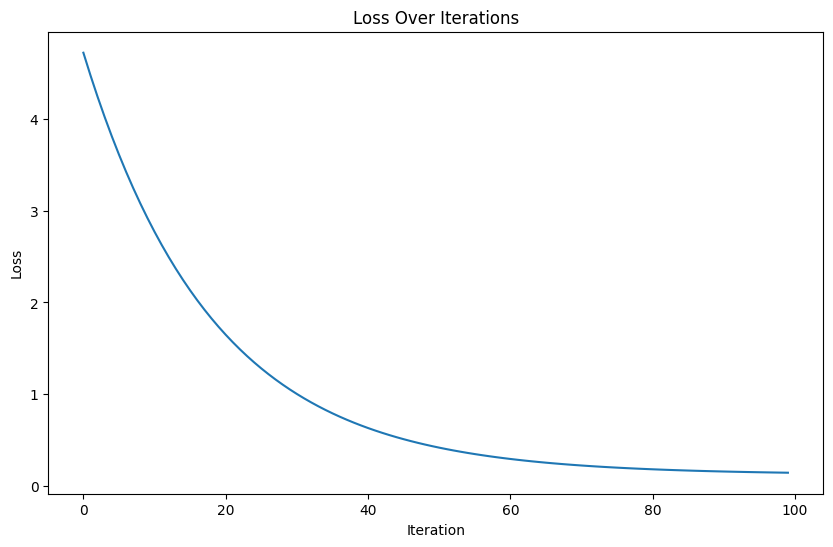

In [81]:
# train the model
trained_weights, losses = train_model(data[0], data[1], weights, iterations=100, learning_rate=0.01)
# plot the loss
plot_loss(losses)
# create a function to evaluate the model
def evaluate_model(X, y, weights):
    predictions = forward_pass(X, weights.T)
    loss = calculate_loss(weights.T, X, y)
    loss = np.mean(loss)
    print(f"Evaluation Loss: {loss}")
    return predictions

In [82]:
# print the weights
print("Trained Weights:")
print(trained_weights)

Trained Weights:
[[ 2.31162905e-01  3.33107147e-01  3.03192527e-01 -2.50056600e-01
   1.10571960e-01 -8.74942730e-02  4.69664447e-01 -1.28000600e-01
   3.43226477e-01 -7.23832439e-02]
 [ 1.57974210e-01  2.02674047e-01  3.80769513e-01  2.97846354e-01
   2.59155024e-01 -2.76894671e-01  7.34032265e-02  2.43993510e-01
   2.43056641e-01 -3.41535727e-01]
 [-2.74246127e-02  3.33959510e-01  1.31440608e-01  4.24182827e-02
  -3.39631091e-01  1.61869172e-01 -2.26786055e-02  1.16720919e-01
   3.28835713e-01  4.25914829e-01]
 [ 3.03648841e-01 -2.71128500e-01  2.36948086e-02 -1.86149963e-02
   5.24164418e-01  8.56596175e-02 -1.64160673e-01  5.43167271e-01
   1.99622542e-01 -1.06809234e-01]
 [ 1.19246541e-02  3.77966590e-01  3.74130217e-01  3.14069588e-01
  -2.76179145e-01 -2.20200617e-01  4.49701843e-01 -1.46067871e-01
  -4.97748054e-02  3.19726542e-01]
 [-8.78769307e-03  6.59224607e-02 -3.60868852e-01  3.61845801e-01
  -5.63985657e-02  1.79753601e-01  4.52400596e-01  2.32212763e-01
   2.73528458e-0

In [83]:
# wrap the training inside a function
def linearRegression(X: np.array, Y: np.array, lr: float, lambda_: float):
    n_samples, n_features = X.shape
    # weights = np.zeros((n_features, 1))
    weights = np.random.rand(n_features, 1)  # Initialize weights randomly

    weights = newtons_method(X, Y, max_iter=100, tolerance=1e-6 , lambda_=lambda_)

    return weights

In [84]:
# test the linearRegression function
lr = 0.01
lambda_ = 0.1 # regularization parameter
trained_weights = linearRegression(data[0], data[1], lr, lambda_)
# evaluate the model
predictions = evaluate_model(data[0], data[1], trained_weights)
# print the predictions
print("Predictions:")
print(predictions)

Evaluation Loss: 0.07584703335030059
Predictions:
[0.4330059  0.5557196  0.37388292 0.36570394 0.37642646 0.46689744
 0.40964623 0.45296383 0.49304781 0.3257389  0.49418995 0.48743773
 0.53932548 0.41475226 0.60493857 0.51522952 0.50432181 0.42231754
 0.38518004 0.46023981 0.48280552 0.4638801  0.43385989 0.34048758
 0.62753505 0.40465087 0.46498017 0.45850743 0.42012036 0.33608987
 0.39466066 0.57057511 0.4281411  0.67278921 0.42334346 0.35367346
 0.44228565 0.50004817 0.51911773 0.4289619  0.55845836 0.482954
 0.39314537 0.40940939 0.47981643 0.53218449 0.36710349 0.26493743
 0.49513966 0.50363114 0.36296195 0.34141044 0.42398914 0.37943075
 0.50838724 0.30507325 0.39184504 0.3539628  0.4658722  0.4951367
 0.5079955  0.30193953 0.42856909 0.53242056 0.26863183 0.55185533
 0.34932891 0.49489525 0.43097913 0.21064929 0.3858335  0.54557097
 0.45039061 0.50363774 0.56038883 0.49468347 0.47902122 0.55079016
 0.29258565 0.45042654 0.53488728 0.45487342 0.45174666 0.55181451
 0.36735813 0.5